In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm
import numpy as np
import warnings

warnings.filterwarnings('ignore')
plt.rc('font', family='d2coding')

In [3]:
poker_df = pd.read_csv(r'C:\Users\user\OneDrive\포커 기록지.csv', index_col=0)

In [4]:
poker_df = poker_df.loc[:, ~poker_df.columns.str.startswith('Unnamed')][poker_df.index.str.contains('2024-02-25')]

In [5]:
poker_df

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
2024-02-25-01,-300,3000.0,8500.0,3700,-15000.0,NaN,NaN,NaN
2024-02-25-02,12800,5300.0,-9700.0,6600,-15000.0,NaN,NaN,NaN
2024-02-25-03,-5800,-4300.0,-4700.0,-15000,29800.0,NaN,NaN,NaN
2024-02-25-04,-5400,28200.0,-11500.0,-13000,700.0,NaN,NaN,NaN
2024-02-25-05,13500,-13800.0,-600.0,2700,-1800.0,NaN,NaN,NaN
2024-02-25-06,-9900,-15000.0,4700.0,17200,3000.0,NaN,NaN,NaN


In [6]:
poker_df.describe()

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
count,6.000000,6.000000,6.000000,6.000000,6.000000,0.0,0.0,0.0
mean,816.666667,566.666667,-2216.666667,366.666667,283.333333,NaN,NaN,NaN
std,10029.838816,15901.781871,7920.206226,12276.590189,16433.431372,NaN,NaN,NaN
min,-9900.000000,-15000.000000,-11500.000000,-15000.000000,-15000.000000,NaN,NaN,NaN
25%,-5700.000000,-11425.000000,-8450.000000,-9075.000000,-11700.000000,NaN,NaN,NaN
50%,-2850.000000,-650.000000,-2650.000000,3200.000000,-550.000000,NaN,NaN,NaN
75%,9525.000000,4725.000000,3375.000000,5875.000000,2425.000000,NaN,NaN,NaN
max,13500.000000,28200.000000,8500.000000,17200.000000,29800.000000,NaN,NaN,NaN


In [7]:
pd.DataFrame(poker_df.sum(), columns=["누적 수익"]).T

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
누적 수익,4900.0,3400.0,-13300.0,2200.0,1700.0,0.0,0.0,0.0


In [8]:
for col in poker_df.columns:
    data = poker_df[col].dropna()
    skew_val = skew(data)
    kurt_val = kurtosis(data)
    print(f'Column: {col}, Skewness: {skew_val}, Kurtosis: {kurt_val}')

Column: 임동휘, Skewness: 0.4340695050297216, Kurtosis: -1.5035200630247434
Column: 남형준, Skewness: 0.7828849176742575, Kurtosis: -0.4270042957703941
Column: 이도훈, Skewness: 0.14617055306893853, Kurtosis: -1.4089632775595928
Column: 권주찬, Skewness: -0.11307493810580345, Kurtosis: -1.2076484812314412
Column: 오준혁, Skewness: 0.9175934932747323, Kurtosis: -0.14281456883499555
Column: 김태윤, Skewness: nan, Kurtosis: nan
Column: 정재영, Skewness: nan, Kurtosis: nan
Column: 유승훈, Skewness: nan, Kurtosis: nan


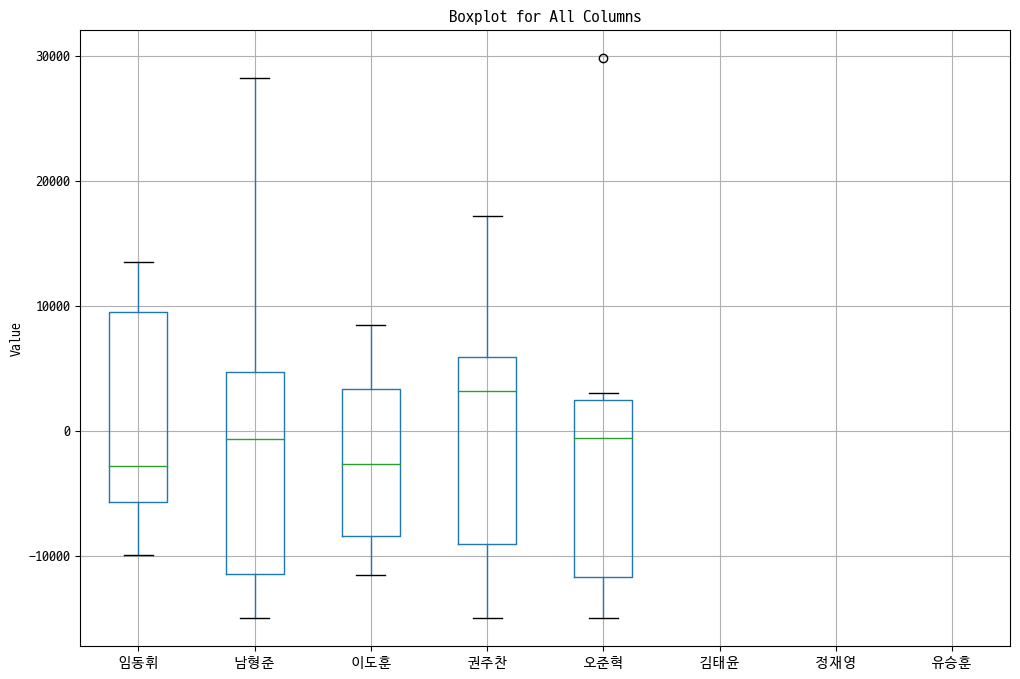

In [9]:
# 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 컬럼 별로 박스 플롯 그리기
poker_df.boxplot()
plt.title('Boxplot for All Columns')
plt.ylabel('Value')
plt.grid(True)
plt.show()

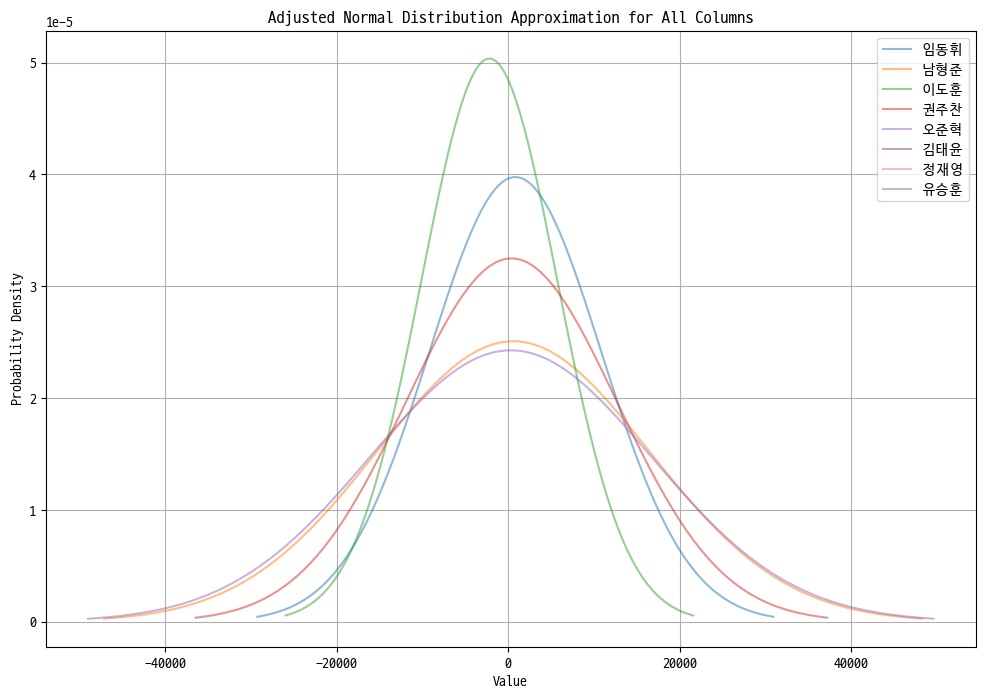

In [10]:
# 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 컬럼 별로 그래프 그리기
for col in poker_df.columns:
    data = poker_df[col].dropna()
    mean = data.mean()
    std = data.std()

    # 왜도를 고려하여 정규 분포를 근사화하기 위한 x 값 생성
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    
    # 정규 분포 함수 값 계산
    y = norm.pdf(x, mean, std)
    
    # 조정된 정규 분포 함수 값 계산
    adj_y = norm.pdf(x, mean, std)
    
    # 그래프 그리기
    plt.plot(x, adj_y, label=f'{col}', alpha=0.5)

plt.title('Adjusted Normal Distribution Approximation for All Columns')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()


 - skewness가 1 이상이면 정규분포 근사가 어려움

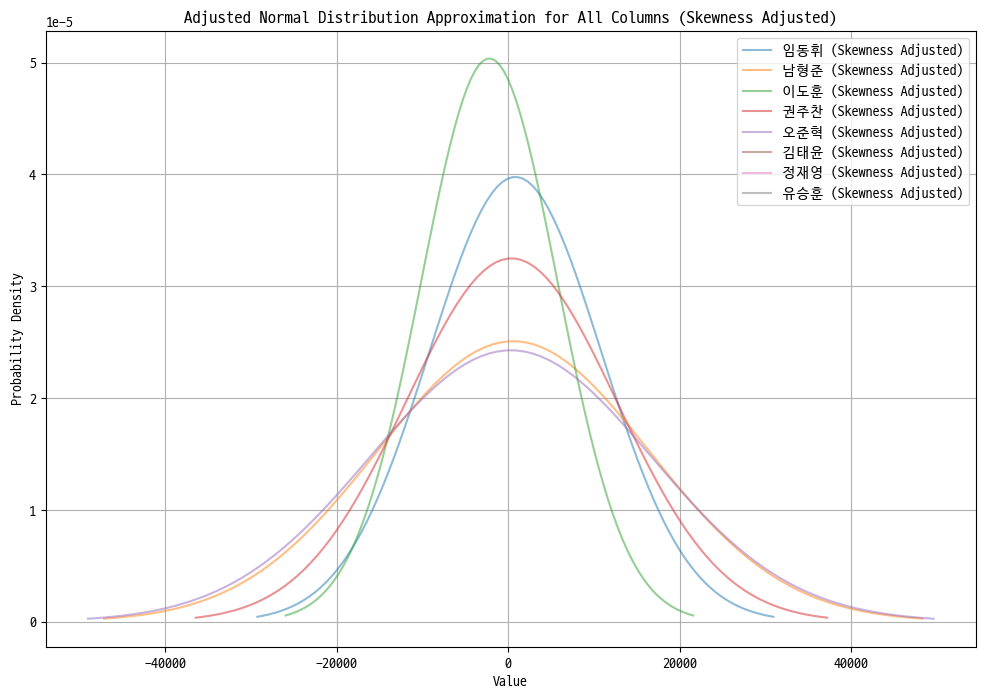

In [11]:
# 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 컬럼 별로 그래프 그리기
for col in poker_df.columns:
    data = poker_df[col].dropna()
    mean = data.mean()
    std = data.std()
    skewness = skew(data)

    # 왜도가 1보다 큰 경우에는 로그 변환을 적용하여 데이터 보정
    
    
    # 보정된 데이터로부터 평균과 표준편차 다시 계산
    mean = data.mean()
    std = data.std()

    # 왜도를 고려하여 정규 분포를 근사화하기 위한 x 값 생성
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    
    # 정규 분포 함수 값 계산
    y = norm.pdf(x, mean, std)
    
    # 그래프 그리기
    plt.plot(x, y, label=f'{col} (Skewness Adjusted)', alpha=0.5)
    
plt.title('Adjusted Normal Distribution Approximation for All Columns (Skewness Adjusted)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()
